In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="subprocess.run")

%run utility_functions.ipynb

In [2]:
df = pd.read_csv("data/FedCycleData.csv")
df.sample(5)

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
1420,nfp8294,12,0,1,0,32,,21,11,,...,,,,,,,,,,
453,nfp8099,7,1,1,0,28,,13,15,12,...,,,,,,,,,,
560,nfp8124,7,0,1,0,30,,17,13,,...,,,,,,,,,,
245,nfp8060,3,1,1,0,28,,14,14,9,...,,,,,,,,,,
1027,nfp8212,11,0,1,0,35,,21,14,11,...,,,,,,,,,,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ClientID                    1665 non-null   object
 1   CycleNumber                 1665 non-null   int64 
 2   Group                       1665 non-null   int64 
 3   CycleWithPeakorNot          1665 non-null   int64 
 4   ReproductiveCategory        1665 non-null   int64 
 5   LengthofCycle               1665 non-null   int64 
 6   MeanCycleLength             1665 non-null   object
 7   EstimatedDayofOvulation     1665 non-null   object
 8   LengthofLutealPhase         1665 non-null   object
 9   FirstDayofHigh              1665 non-null   object
 10  TotalNumberofHighDays       1665 non-null   object
 11  TotalHighPostPeak           1665 non-null   object
 12  TotalNumberofPeakDays       1665 non-null   object
 13  TotalDaysofFertility        1665 non-null   obje

In [4]:
print("Total null values",sum(df.isna().sum()))
df.isna().sum()

Total null values 0


ClientID                0
CycleNumber             0
Group                   0
CycleWithPeakorNot      0
ReproductiveCategory    0
                       ..
NextpregM               0
Spousesame              0
SpousesameM             0
Timeattemptpreg         0
BMI                     0
Length: 80, dtype: int64

## Data types of each column

In [5]:
types = df.dtypes
columns = df.columns

list(zip(types, columns))

[(dtype('O'), 'ClientID'),
 (dtype('int64'), 'CycleNumber'),
 (dtype('int64'), 'Group'),
 (dtype('int64'), 'CycleWithPeakorNot'),
 (dtype('int64'), 'ReproductiveCategory'),
 (dtype('int64'), 'LengthofCycle'),
 (dtype('O'), 'MeanCycleLength'),
 (dtype('O'), 'EstimatedDayofOvulation'),
 (dtype('O'), 'LengthofLutealPhase'),
 (dtype('O'), 'FirstDayofHigh'),
 (dtype('O'), 'TotalNumberofHighDays'),
 (dtype('O'), 'TotalHighPostPeak'),
 (dtype('O'), 'TotalNumberofPeakDays'),
 (dtype('O'), 'TotalDaysofFertility'),
 (dtype('O'), 'TotalFertilityFormula'),
 (dtype('O'), 'LengthofMenses'),
 (dtype('O'), 'MeanMensesLength'),
 (dtype('O'), 'MensesScoreDayOne'),
 (dtype('O'), 'MensesScoreDayTwo'),
 (dtype('O'), 'MensesScoreDayThree'),
 (dtype('O'), 'MensesScoreDayFour'),
 (dtype('O'), 'MensesScoreDayFive'),
 (dtype('O'), 'MensesScoreDaySix'),
 (dtype('O'), 'MensesScoreDaySeven'),
 (dtype('O'), 'MensesScoreDayEight'),
 (dtype('O'), 'MensesScoreDayNine'),
 (dtype('O'), 'MensesScoreDayTen'),
 (dtype('O')

## BMI
There are lots of missing values in a form of empty string `" "`.

In [6]:
# Replace the empty string with NaN
df['BMI'] = df['BMI'].replace(" ", np.nan)
df['BMI'] = df['BMI'].astype(float) # ValueError: could not convert string to float: ' '

In [7]:
df.BMI.isnull().sum() / len(df)

0.9213213213213213

__92% null values in BMI column__



# Replace all the `" "` values with nan

In [8]:
df = df.replace(" ", np.nan)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ClientID                    1665 non-null   object 
 1   CycleNumber                 1665 non-null   int64  
 2   Group                       1665 non-null   int64  
 3   CycleWithPeakorNot          1665 non-null   int64  
 4   ReproductiveCategory        1665 non-null   int64  
 5   LengthofCycle               1665 non-null   int64  
 6   MeanCycleLength             141 non-null    object 
 7   EstimatedDayofOvulation     1515 non-null   object 
 8   LengthofLutealPhase         1514 non-null   object 
 9   FirstDayofHigh              1407 non-null   object 
 10  TotalNumberofHighDays       1653 non-null   object 
 11  TotalHighPostPeak           1662 non-null   object 
 12  TotalNumberofPeakDays       1649 non-null   object 
 13  TotalDaysofFertility        1634 

## List of feature which has missing values not more than 60%

In [10]:
null_percentages = df.isnull().mean() * 100
selected_features = null_percentages[null_percentages <= 90].index.tolist()
selected_df = df[selected_features]
selected_df.shape

(1665, 26)

In [11]:
selected_df.isnull().mean()

ClientID                      0.000000
CycleNumber                   0.000000
Group                         0.000000
CycleWithPeakorNot            0.000000
ReproductiveCategory          0.000000
LengthofCycle                 0.000000
EstimatedDayofOvulation       0.090090
LengthofLutealPhase           0.090691
FirstDayofHigh                0.154955
TotalNumberofHighDays         0.007207
TotalHighPostPeak             0.001802
TotalNumberofPeakDays         0.009610
TotalDaysofFertility          0.018619
TotalFertilityFormula         0.001201
LengthofMenses                0.002402
MensesScoreDayOne             0.002402
MensesScoreDayTwo             0.002402
MensesScoreDayThree           0.015015
MensesScoreDayFour            0.052252
MensesScoreDayFive            0.260661
MensesScoreDaySix             0.637838
MensesScoreDaySeven           0.865465
TotalMensesScore              0.002402
NumberofDaysofIntercourse     0.000601
IntercourseInFertileWindow    0.000601
UnusualBleeding          

In [12]:
# Remove unnecessary column
selected_df = selected_df.drop("ClientID", axis=1)

In [13]:
# Change the data type from object to float
selected_df = selected_df.astype("float")

## Creating the class

In [14]:
selected_df['Healthy'] = (selected_df['LengthofCycle'] >= 21) & (selected_df['LengthofCycle'] <= 35)
selected_df['Healthy'] = selected_df['Healthy'].replace({True: 1, False: 0})

In [15]:
n_women = df['ClientID'].nunique()
n_women, len(df), df['LengthofCycle'].nunique()

(159, 1665, 32)

In [16]:
# Fill the missing values
df_filled = selected_df.fillna(selected_df.mean())
sum(df_filled.isnull().sum())

0

In [17]:
df_filled.Healthy.value_counts(normalize=True)

Healthy
1    0.926126
0    0.073874
Name: proportion, dtype: float64

# Classification

## Train test split

In [18]:
from sklearn.model_selection import train_test_split

X = df_filled.drop('Healthy', axis=1)
y = df_filled['Healthy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Percentage of each class in train and test set

In [19]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Healthy
1    0.926426
0    0.073574
Name: proportion, dtype: float64
Healthy
1    0.924925
0    0.075075
Name: proportion, dtype: float64


## Scaling

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# __Logistic Regression__

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import f1_score, classification_report

rf_classifier = LogisticRegression(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
evaluate_classifier(y_test, y_pred) 

Accuracy: 0.9819819819819819
AUC Score: 0.88
F1 Score: 0.9903536977491961
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86        25
           1       0.98      1.00      0.99       308

    accuracy                           0.98       333
   macro avg       0.99      0.88      0.93       333
weighted avg       0.98      0.98      0.98       333



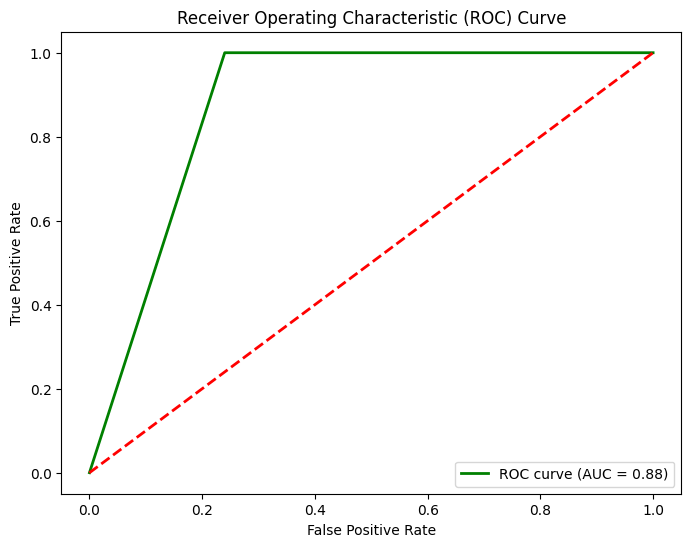

In [22]:
y_pred_prob = rf_classifier.predict(X_test)
plot_roc_curve(y_test, y_pred_prob)

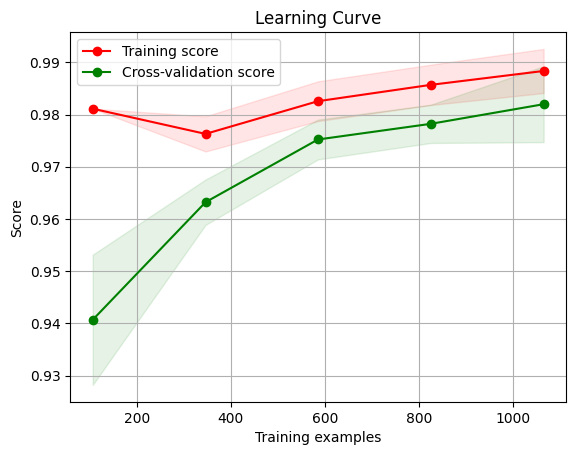

In [23]:
plot_learning_curve(rf_classifier, "Learning Curve", X_train, y_train, cv=5)

# __TabNet__

In [24]:
from pytorch_tabnet.tab_model import TabNetClassifier

clf_tabnet = TabNetClassifier()
clf_tabnet.fit(
  X_train, y_train,
  eval_set=[(X_test, y_test)],
  eval_metric=['auc']
)

epoch 0  | loss: 0.90622 | val_0_auc: 0.69753 |  0:00:00s
epoch 1  | loss: 0.70472 | val_0_auc: 0.59143 |  0:00:00s
epoch 2  | loss: 0.55624 | val_0_auc: 0.64844 |  0:00:00s
epoch 3  | loss: 0.47309 | val_0_auc: 0.6687  |  0:00:00s
epoch 4  | loss: 0.39432 | val_0_auc: 0.69792 |  0:00:00s
epoch 5  | loss: 0.33317 | val_0_auc: 0.58727 |  0:00:00s
epoch 6  | loss: 0.29663 | val_0_auc: 0.57571 |  0:00:00s
epoch 7  | loss: 0.29036 | val_0_auc: 0.61325 |  0:00:00s
epoch 8  | loss: 0.28301 | val_0_auc: 0.63844 |  0:00:00s
epoch 9  | loss: 0.25904 | val_0_auc: 0.67442 |  0:00:00s
epoch 10 | loss: 0.20504 | val_0_auc: 0.72117 |  0:00:00s
epoch 11 | loss: 0.25349 | val_0_auc: 0.75377 |  0:00:00s
epoch 12 | loss: 0.20536 | val_0_auc: 0.77377 |  0:00:00s
epoch 13 | loss: 0.20458 | val_0_auc: 0.80494 |  0:00:01s
epoch 14 | loss: 0.20254 | val_0_auc: 0.84818 |  0:00:01s
epoch 15 | loss: 0.17061 | val_0_auc: 0.87    |  0:00:01s
epoch 16 | loss: 0.17355 | val_0_auc: 0.86143 |  0:00:01s
epoch 17 | los

In [25]:
y_pred = clf_tabnet.predict(X_test)

In [26]:
evaluate_classifier(y_test, y_pred) 

Accuracy: 0.978978978978979
AUC Score: 0.91512987012987
F1 Score: 0.9886547811993517
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.99      0.99      0.99       308

    accuracy                           0.98       333
   macro avg       0.93      0.92      0.92       333
weighted avg       0.98      0.98      0.98       333



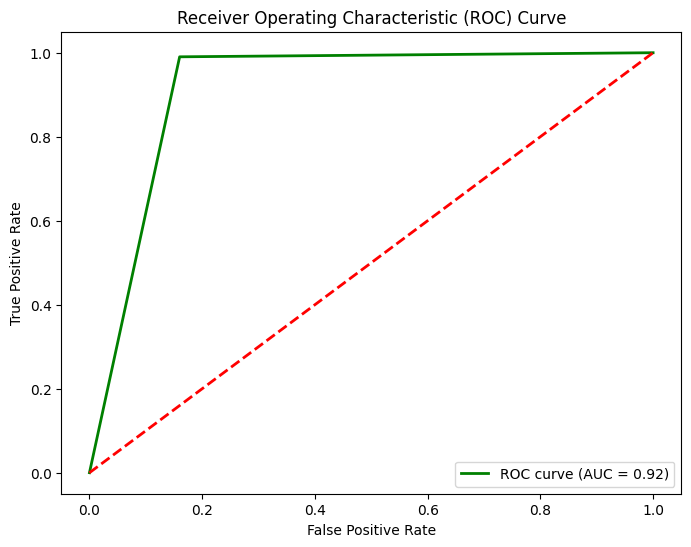

In [27]:
plot_roc_curve(y_test, y_pred)